In [2]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


In [14]:
# set path to the data
class_df_path <- file.path("..","data","processed","aggregate_mAPs","mAP_scores_class.csv")
reg_df_path <- file.path("..","data","processed","mAP_scores","mAP_scores_regular_class.csv")
shuffled_df_path <- file.path("..","data","processed","mAP_scores","mAP_scores_shuffled_class.csv")
shuffled_feature_space_df_path <- file.path("..","data","processed","mAP_scores","mAP_scores_shuffled_feature_space_class.csv")
# read in the data
class_df <- read.csv(class_df_path)
reg_df <- read.csv(reg_df_path)
shuffled_df <- read.csv(shuffled_df_path)
shuffled_feature_space_df <- read.csv(shuffled_feature_space_df_path)

head(class_df)

,Metadata_labels,mean_average_precision,nlog10pvalue,q_value,nlog10qvalue,above_p_threshold,above_q_threshold,shuffled
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Apoptosis,0.05948675,0.30103,0.5,0.30103,False,False,features_shuffled
2,Apoptosis,0.64044601,0.00000,1.0,0.00000,False,False,non-shuffled
3,Apoptosis,0.08938349,0.00000,1.0,0.00000,False,False,phenotype_shuffled
4,Control,0.53048307,0.00000,1.0,0.00000,False,False,features_shuffled
5,Control,0.60331815,0.30103,0.5,0.30103,False,False,non-shuffled
6,Control,0.51707189,0.00000,1.0,0.00000,False,False,phenotype_shuffled


## Clean the class data

In [11]:
# declare the shuffled column as a factor
# replace the values in the shuffled column
class_df$shuffled <- gsub("features_shuffled", "Shuffled features", class_df$shuffled)
class_df$shuffled <- gsub("phenotype_shuffled", "Shuffled phenotypes", class_df$shuffled)
class_df$shuffled <- gsub("non-shuffled", "Non-shuffled", class_df$shuffled)
class_df$shuffled <- factor(class_df$shuffled, levels = c( "Non-shuffled", "Shuffled features", "Shuffled phenotypes"))
class_df$Metadata_labels <- factor(class_df$Metadata_labels, levels = c("Control", "Apoptosis", "Pyroptosis"))

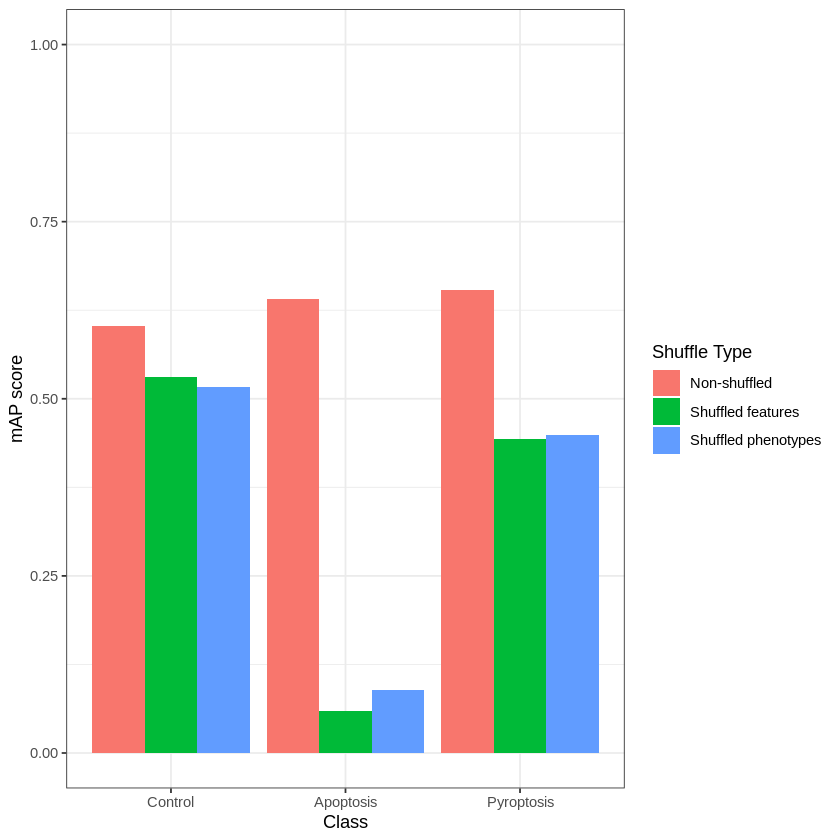

In [12]:
# plot the data
barplot <- (
    ggplot(class_df, aes(x=Metadata_labels, y=mean_average_precision, fill=shuffled))
    + geom_bar(stat="identity", position="dodge")
    + labs(x="Class", y="mAP score")
    # legend title
    + scale_fill_discrete(name="Shuffle Type")
    + theme_bw()
    + ylim(0,1)
)
barplot

## Clean the single well data

In [23]:
# combine the dataframes
all_df <- rbind(reg_df, shuffled_df, shuffled_feature_space_df)
all_df$shuffled <- gsub("features_shuffled", "Shuffled features", all_df$shuffled)
all_df$shuffled <- gsub("phenotype_shuffled", "Shuffled phenotypes", all_df$shuffled)
all_df$shuffled <- gsub("non-shuffled", "Non-shuffled", all_df$shuffled)
all_df$shuffled <- factor(all_df$shuffled, levels = c( "Non-shuffled", "Shuffled features", "Shuffled phenotypes"))
all_df$Metadata_labels <- factor(all_df$Metadata_labels, levels = c("Control", "Apoptosis", "Pyroptosis"))
head(all_df)

,Metadata_Well,Metadata_labels,average_precision,p_value,n_pos_pairs,n_total_pairs,shuffled
,<chr>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>
1,B02,Pyroptosis,0.6058954,0.5,64,153,Non-shuffled
2,B03,Pyroptosis,0.4928594,0.5,64,153,Non-shuffled
3,B04,Pyroptosis,0.8348631,0.5,64,153,Non-shuffled
4,B05,Pyroptosis,0.8197766,0.5,64,153,Non-shuffled
5,B06,Control,0.7005115,0.5,80,153,Non-shuffled
6,B07,Control,0.6046329,0.5,80,153,Non-shuffled


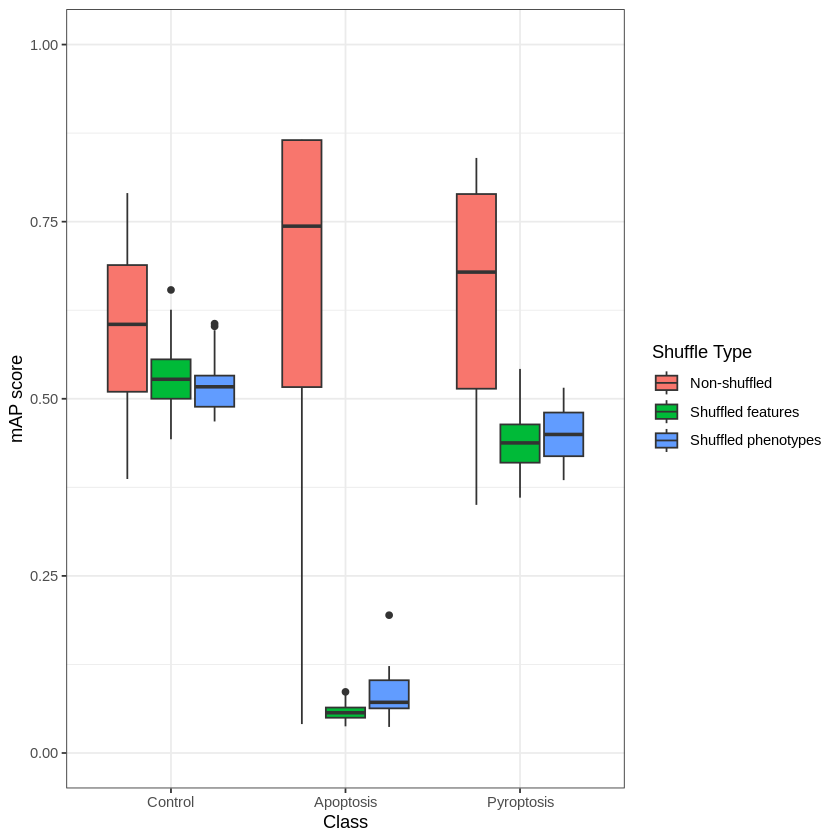

In [25]:
boxplot <- (
    ggplot(all_df, aes(x=Metadata_labels, y=average_precision, fill=shuffled))
    + geom_boxplot()
    + labs(x="Class", y="mAP score")
    # legend title
    + scale_fill_discrete(name="Shuffle Type")
    + theme_bw()
    + ylim(0,1)
    
)
boxplot